# Tiny ImageNet

## Imports

In [1]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt


import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

sys.path.insert(0, '../../Utils/')

import models
from train import *
from metrics import * 
from data_downloaders import * 

print("Python: %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

# determine device to run network on (runs on gpu if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Python: 3.6.5 (default, Jun 21 2018, 23:07:39) 
[GCC 5.4.0 20160609]
Pytorch: 0.4.0


## Hyperparameters

In [2]:
n_epochs = 50
batch_size = 64
lr = 0.001
k = 3
loss = nn.CrossEntropyLoss()

## Load Tiny ImageNet
### https://tiny-imagenet.herokuapp.com/

Tiny ImageNet already downloaded.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 64, 64])


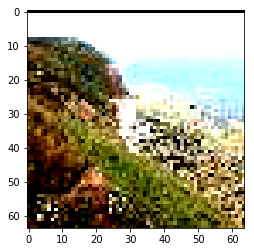

In [3]:
get_tiny_imagenet('../../Datasets/')

n_classes = 200

train_dir = "../../Datasets/tiny-imagenet-200/train"
test_dir = "../../Datasets/tiny-imagenet-200/val"


# Data augmentation 
train_transform = torchvision.transforms.Compose([
    #torchvision.transforms.RandomRotation(10),
    #torchvision.transforms.RandomHorizontalFlip(),
    #torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

test_transform = torchvision.transforms.Compose([
    #torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
    



# load training set 
trainset = torchvision.datasets.ImageFolder(train_dir, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1)

# load test set 
testset = torchvision.datasets.ImageFolder(test_dir, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=1)

# helper function to unnormalize and plot image 
def imshow(img):
    img = np.array(img)
    img = img / 2 + 0.5
    img = np.moveaxis(img, 0, -1)
    plt.imshow(img)
    
# display sample from dataset 
imgs,labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))  
print(imgs[0].shape)
imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([ 195,  128,  158,   14,   49,   44,  164,  101,   20,  172,
         181,  114,   74,    0,  141,  102,   50,   31,   48,   39,
         183,  177,   69,   99,   32,   12,   14,  181,  112,   56,
         148,  162,  121,  153,  141,  159,  189,   80,   73,   74,
          12,  185,   18,   70,    9,   43,  193,   10,  130,   42,
         171,  139,  105,   50,   99,  144,    2,  148,   68,  150,
          31,  159,  137,   44])


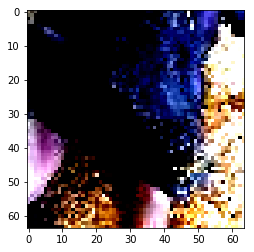

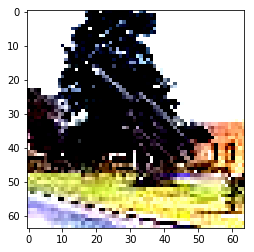

In [4]:
print(labels)
plt.figure()
imshow(imgs[18])
plt.figure()
imshow(imgs[62])

## Train Convolutional Neural Network

In [ ]:
conv_net = models.tiny_cnn(n_in=3, n_out=200, n_hidden=512, size=64).to(device)

conv_net.apply(models.weights_init)

#conv_optim = optim.Adam(conv_net.parameters(), lr=lr)
conv_optim = optim.SGD(conv_net.parameters(), lr=0.001, momentum=0.9, nesterov=True)

train(conv_net, trainloader, testloader, conv_optim, loss, n_epochs, verbose=True)

print("\nPerformance on training set: ")
train_accuracy = eval_target_net(conv_net, trainloader, classes=None)

print("\nPerformance on test set: ")
test_accuracy = eval_target_net(conv_net, testloader, classes=None)

[0/50][0/1563] loss = 6.598560
[0/50][1/1563] loss = 15.457529
[0/50][2/1563] loss = 31.937389
[0/50][3/1563] loss = 35.875675
[0/50][4/1563] loss = 56.721340
[0/50][5/1563] loss = 65.472595
[0/50][6/1563] loss = 143.601532
[0/50][7/1563] loss = 82.223450
[0/50][8/1563] loss = 161.214294
[0/50][9/1563] loss = 178.491470
[0/50][10/1563] loss = 285.067413
[0/50][11/1563] loss = 220.847229
[0/50][12/1563] loss = 282.134949
[0/50][13/1563] loss = 377.987793
[0/50][14/1563] loss = 383.772003
[0/50][15/1563] loss = 398.727600
[0/50][16/1563] loss = 332.205841
[0/50][17/1563] loss = 351.321777
[0/50][18/1563] loss = 368.094696
[0/50][19/1563] loss = 335.066925
[0/50][20/1563] loss = 260.852631
[0/50][21/1563] loss = 406.630951
[0/50][22/1563] loss = 430.477997
[0/50][23/1563] loss = 327.186798
[0/50][24/1563] loss = 486.077057
[0/50][25/1563] loss = 300.833771
[0/50][26/1563] loss = 353.170166
[0/50][27/1563] loss = 510.289917
[0/50][28/1563] loss = 391.322052
[0/50][29/1563] loss = 510.81042

[0/50][245/1563] loss = 9.824228
[0/50][246/1563] loss = 6.546347
[0/50][247/1563] loss = 7.548934
[0/50][248/1563] loss = 8.961158
[0/50][249/1563] loss = 5.895943
[0/50][250/1563] loss = 5.685379
[0/50][251/1563] loss = 5.458190
[0/50][252/1563] loss = 9.314273
[0/50][253/1563] loss = 6.834883
[0/50][254/1563] loss = 7.953298
[0/50][255/1563] loss = 6.358723
[0/50][256/1563] loss = 5.362906
[0/50][257/1563] loss = 5.617045
[0/50][258/1563] loss = 5.439625
[0/50][259/1563] loss = 5.515314
[0/50][260/1563] loss = 12.785725
[0/50][261/1563] loss = 7.230143
[0/50][262/1563] loss = 6.958848
[0/50][263/1563] loss = 6.228229
[0/50][264/1563] loss = 5.213274
[0/50][265/1563] loss = 5.555436
[0/50][266/1563] loss = 5.743452
[0/50][267/1563] loss = 6.160923
[0/50][268/1563] loss = 5.579069
[0/50][269/1563] loss = 5.233165
[0/50][270/1563] loss = 5.385519
[0/50][271/1563] loss = 5.366550
[0/50][272/1563] loss = 5.770148
[0/50][273/1563] loss = 5.255236
[0/50][274/1563] loss = 5.098204
[0/50][27

[0/50][494/1563] loss = 5.148686
[0/50][495/1563] loss = 5.223304
[0/50][496/1563] loss = 5.130100
[0/50][497/1563] loss = 5.136980
[0/50][498/1563] loss = 5.137417
[0/50][499/1563] loss = 5.195014
[0/50][500/1563] loss = 5.030368
[0/50][501/1563] loss = 5.203187
[0/50][502/1563] loss = 5.114879
[0/50][503/1563] loss = 5.440229
[0/50][504/1563] loss = 5.352074
[0/50][505/1563] loss = 5.211236
[0/50][506/1563] loss = 5.211400
[0/50][507/1563] loss = 5.151521
[0/50][508/1563] loss = 5.230601
[0/50][509/1563] loss = 5.299805
[0/50][510/1563] loss = 5.231781
[0/50][511/1563] loss = 5.302521
[0/50][512/1563] loss = 5.114961
[0/50][513/1563] loss = 5.589048
[0/50][514/1563] loss = 5.227180
[0/50][515/1563] loss = 5.325039
[0/50][516/1563] loss = 6.016475
[0/50][517/1563] loss = 5.204179
[0/50][518/1563] loss = 5.273781
[0/50][519/1563] loss = 5.152665
[0/50][520/1563] loss = 5.401440
[0/50][521/1563] loss = 5.408038
[0/50][522/1563] loss = 5.117893
[0/50][523/1563] loss = 5.129816
[0/50][524

[0/50][743/1563] loss = 5.272520
[0/50][744/1563] loss = 5.230586
[0/50][745/1563] loss = 5.117376
[0/50][746/1563] loss = 5.080941
[0/50][747/1563] loss = 5.121232
[0/50][748/1563] loss = 5.058455
[0/50][749/1563] loss = 4.987433
[0/50][750/1563] loss = 5.235715
[0/50][751/1563] loss = 5.200846
[0/50][752/1563] loss = 5.074234
[0/50][753/1563] loss = 5.114568
[0/50][754/1563] loss = 5.127025
[0/50][755/1563] loss = 5.090949
[0/50][756/1563] loss = 5.211197
[0/50][757/1563] loss = 5.029052
[0/50][758/1563] loss = 5.306540
[0/50][759/1563] loss = 5.146811
[0/50][760/1563] loss = 5.229027
[0/50][761/1563] loss = 5.292100
[0/50][762/1563] loss = 5.171162
[0/50][763/1563] loss = 5.120367
[0/50][764/1563] loss = 5.060199
[0/50][765/1563] loss = 5.177272
[0/50][766/1563] loss = 4.962457
[0/50][767/1563] loss = 5.182760
[0/50][768/1563] loss = 5.171515
[0/50][769/1563] loss = 5.042027
[0/50][770/1563] loss = 5.086594
[0/50][771/1563] loss = 5.191028
[0/50][772/1563] loss = 5.163584
[0/50][773

[0/50][992/1563] loss = 4.922197
[0/50][993/1563] loss = 5.121358
[0/50][994/1563] loss = 5.274135
[0/50][995/1563] loss = 5.128320
[0/50][996/1563] loss = 5.071078
[0/50][997/1563] loss = 4.959385
[0/50][998/1563] loss = 5.346141
[0/50][999/1563] loss = 5.138143
[0/50][1000/1563] loss = 5.077285
[0/50][1001/1563] loss = 5.057333
[0/50][1002/1563] loss = 5.007411
[0/50][1003/1563] loss = 5.084230
[0/50][1004/1563] loss = 5.000112
[0/50][1005/1563] loss = 5.047801
[0/50][1006/1563] loss = 5.041127
[0/50][1007/1563] loss = 5.741827
[0/50][1008/1563] loss = 5.068340
[0/50][1009/1563] loss = 5.003407
[0/50][1010/1563] loss = 4.977376
[0/50][1011/1563] loss = 5.084585
[0/50][1012/1563] loss = 4.987256
[0/50][1013/1563] loss = 5.064270
[0/50][1014/1563] loss = 4.992185
[0/50][1015/1563] loss = 5.698027
[0/50][1016/1563] loss = 5.234867
[0/50][1017/1563] loss = 5.122354
[0/50][1018/1563] loss = 5.161268
[0/50][1019/1563] loss = 5.037051
[0/50][1020/1563] loss = 5.684513
[0/50][1021/1563] loss

[0/50][1234/1563] loss = 4.851337
[0/50][1235/1563] loss = 5.187041
[0/50][1236/1563] loss = 4.990835
[0/50][1237/1563] loss = 4.870313
[0/50][1238/1563] loss = 5.046410
[0/50][1239/1563] loss = 4.969357
[0/50][1240/1563] loss = 4.961434
[0/50][1241/1563] loss = 5.031668
[0/50][1242/1563] loss = 4.971117
[0/50][1243/1563] loss = 4.996563
[0/50][1244/1563] loss = 5.022527
[0/50][1245/1563] loss = 4.905397
[0/50][1246/1563] loss = 4.996470
[0/50][1247/1563] loss = 4.768182
[0/50][1248/1563] loss = 6.025884
[0/50][1249/1563] loss = 4.913440
[0/50][1250/1563] loss = 5.274952
[0/50][1251/1563] loss = 5.245125
[0/50][1252/1563] loss = 5.259572
[0/50][1253/1563] loss = 5.320683
[0/50][1254/1563] loss = 5.462455
[0/50][1255/1563] loss = 7.736014
[0/50][1256/1563] loss = 5.078422
[0/50][1257/1563] loss = 5.540084
[0/50][1258/1563] loss = 5.400376
[0/50][1259/1563] loss = 4.980033
[0/50][1260/1563] loss = 5.144478
[0/50][1261/1563] loss = 5.181678
[0/50][1262/1563] loss = 5.083838
[0/50][1263/15

In [ ]:
# load the torchvision resnet18 implementation 
resnet50 = torchvision.models.resnet50(num_classes=n_classes).to(device)
# resnet fix for cifar10 image size 
resnet50.avgpool = nn.AvgPool2d(2, stride=1)

resnet50.apply(models.weights_init)

#resnet18_optim = optim.Adam(resnet18.parameters(), lr=lr)
resnet50_optim = optim.SGD(resnet50.parameters(), lr=0.0001, momentum=0.9, nesterov=True)

train(resnet50, trainloader, testloader, resnet50_optim, loss, n_epochs, verbose=True)

print("\nPerformance on training set: ")
train_accuracy = eval_target_net(resnet50, trainloader, classes=None)

print("\nPerformance on test set: ")
test_accuracy = eval_target_net(resnet50, testloader, classes=None)

## Train Resnet18

In [ ]:
# load the torchvision resnet18 implementation 
resnet18 = torchvision.models.resnet18(num_classes=n_classes).to(device)
# resnet fix for cifar10 image size 
resnet18.avgpool = nn.AvgPool2d(2, stride=1)

resnet18.apply(models.weights_init)

#resnet18_optim = optim.Adam(resnet18.parameters(), lr=lr)
resnet18_optim = optim.SGD(resnet18.parameters(), lr=0.0001, momentum=0.9, nesterov=True)

train(resnet18, trainloader, testloader, resnet18_optim, loss, n_epochs, verbose=False)

print("\nPerformance on training set: ")
train_accuracy = eval_target_net(resnet18, trainloader, classes=None)

print("\nPerformance on test set: ")
test_accuracy = eval_target_net(resnet18, testloader, classes=None)

## Train VGG16

In [ ]:
vgg16 = torchvision.models.vgg16(num_classes=n_classes)
 
vgg16.classifier = nn.Sequential(
            nn.Linear(2048, 64),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(64, 64),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(64, n_classes),
        )


vgg16.apply(models.weights_init)

vgg16_optim = optim.Adam(vgg16.parameters(), lr=lr)

vgg16 = vgg16.to(device)
train(vgg16, trainloader, testloader, vgg16_optim, loss, n_epochs, verbose=True)

print("\nPerformance on training set: ")
train_accuracy = eval_target_net(vgg16, trainloader, classes=None)

print("\nPerformance on test set: ")
test_accuracy = eval_target_net(vgg16, testloader, classes=None)

## Train AlexNet

In [ ]:
alexnet = models.AlexNet(n_classes=n_classes, size=64).to(device)

alexnet.apply(models.weights_init)

#alexnet_optim = optim.Adam(alexnet.parameters(), lr=lr)
alexnet_optim = optim.SGD(alexnet.parameters(), lr=lr,momentum=0.9)

train(alexnet, trainloader, testloader, alexnet_optim, loss, n_epochs, verbose=True)

print("\nPerformance on training set: ")
train_accuracy = eval_target_net(alexnet, trainloader, classes=None)

print("\nPerformance on test set: ")
test_accuracy = eval_target_net(alexnet, testloader, classes=None)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torch.utils.data as data

import torchvision.transforms as transforms

from torch.autograd import Variable

import math
import os



# --- HELPERS ---

def conv3x3(in_planes, out_planes, stride=1):
    '''
        3x3 convolution with padding
    '''
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False)


# --- COMPONENTS ---

class BasicBlock(nn.Module):
    
    expansion = 1
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
        
    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out



class Bottleneck(nn.Module):
    
    expansion = 4
    
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride
    
    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


# --- ResNet-50 ---

class ResNet(nn.Module):
    
    def __init__(self, block, layers, num_classes=200):
        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,  bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AvgPool2d(2, stride=1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


# --- MAIN ---

net = ResNet(Bottleneck, [3, 4, 6, 3])
net.cuda()

# loss function + optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

# load data set
train_dir = '/root/data/tiny-imagenet-200/train'
#train_dataset = datasets.ImageFolder(train_dir, transform=transforms.ToTensor())
#train_loader = data.DataLoader(train_dataset, batch_size=32)


# train the model
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):

        input, target = data

        # wrap input + target into variables
        input_var = Variable(input).cuda()
        target_var = Variable(target).cuda()

        # compute output
        output = net(input_var)
        loss = criterion(output, target_var)

        # computer gradient + sgd step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print progress
        running_loss += loss.data[0]
        print(i)




torch.save(net.state_dict(), "/models/baseline-resnet50.pt")

In [ ]:
print("\nPerformance on training set: ")
train_accuracy = eval_target_net(net, trainloader, classes=None)

print("\nPerformance on test set: ")
test_accuracy = eval_target_net(net, testloader, classes=None)